Import all necessary modules and libraries

In [ ]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

#Data prepocessing




**About the dataset**

---

Title:
*Census Data - Selected socioeconomic indicators in Chicago, 2008 – 2012*.

---
The dataset contains some indicators of public well-being in different districts of Chicago


---


Additional information on columns in the dataset
*   PERCENT OF HOUSING CROWDED: the percent of occupied housing units with more than one person per room
*   PERCENT HOUSEHOLDS BELOW POVERTY: the percent of households living below the federal poverty level
*   PERCENT AGED 16+ UNEMPLOYED: the percent of persons in the labor force over the age of 16 years that are unemployed
*   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA: the percent of persons over the age of 25 years without a high school diploma
*   PERCENT AGED UNDER 18 OR OVER 64: the percent of the population under 18 or over 64 years of age (i.e., dependency)
*   PER CAPITA INCOME: *no additional information found*
*   HARDSHIP INDEX: score that incorporates each of the
six selected socioeconomic indicators
---
[Source](https://catalog.data.gov/dataset/census-data-selected-socioeconomic-indicators-in-chicago-2008-2012)



In [ ]:
link = 'https://data.cityofchicago.org/api/views/kn9c-c2s2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(link)
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


Select only relevant information

1.   omit last row as it's a summary of previous rows
2.   omit column `Community Area Number` as it's strange to calculate correlation between code of community area and socioeconomic indicators
3. omit column `COMMUNITY AREA NAME` for the same reason

In [ ]:
df = df.iloc[:-1, 2:]
df

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...
72,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,3.6,15.4,7.1,10.9,30.3,25828,24.0


Check for NaN values

In [ ]:
df.isna().sum()

PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  0
dtype: int64

Get list of columns names to check where they stripped or not. `'PER CAPITA INCOME '` contains whitespase at the end

In [ ]:
list(df.columns)

['PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

#Pearson correlation

Calculate Pearson coefficient between two indicators

In [ ]:
df['PERCENT HOUSEHOLDS BELOW POVERTY'].corr(df['PER CAPITA INCOME '])

-0.5668512884609133

It works good, so by iteratively calculating correlation between one indicator and others it's possible to get the strongest correlation

In [ ]:
def get_max_corr(dataframe):
    """
    Finds variables with the highest Pearson correlation coefficient
    """
    corrs = {}
    for comb in itertools.combinations(dataframe.columns, 2): # create pairs of columns names: (column_1, column_2), (column_1, column_3) ...
        corrs[comb] = dataframe[comb[0]].corr(dataframe[comb[1]])

    max_correlated = max(corrs, key=lambda x: abs(corrs[x]))
    max_correlation_value = corrs[max_correlated]
    return max_correlated, max_correlation_value

In [ ]:
print(*get_max_corr(df))

('PERCENT OF HOUSING CROWDED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA') 0.8759528997943155


Well, getting high school diploma isn't such a bad idea, after all.
At least if we're a sure that the correlation between this features isn't just a coincidence.

More colorful way to analyze correlations is to create a heatmap

In [ ]:
def show_heatmap(data, mask=None, title=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(data, cmap='PRGn',  linewidths=3, annot=True, annot_kws={'fontstyle':'oblique', 'fontsize': 'x-large'}, mask=mask)
    if title:
      ax.set_title(title, fontsize=20)
    plt.show()

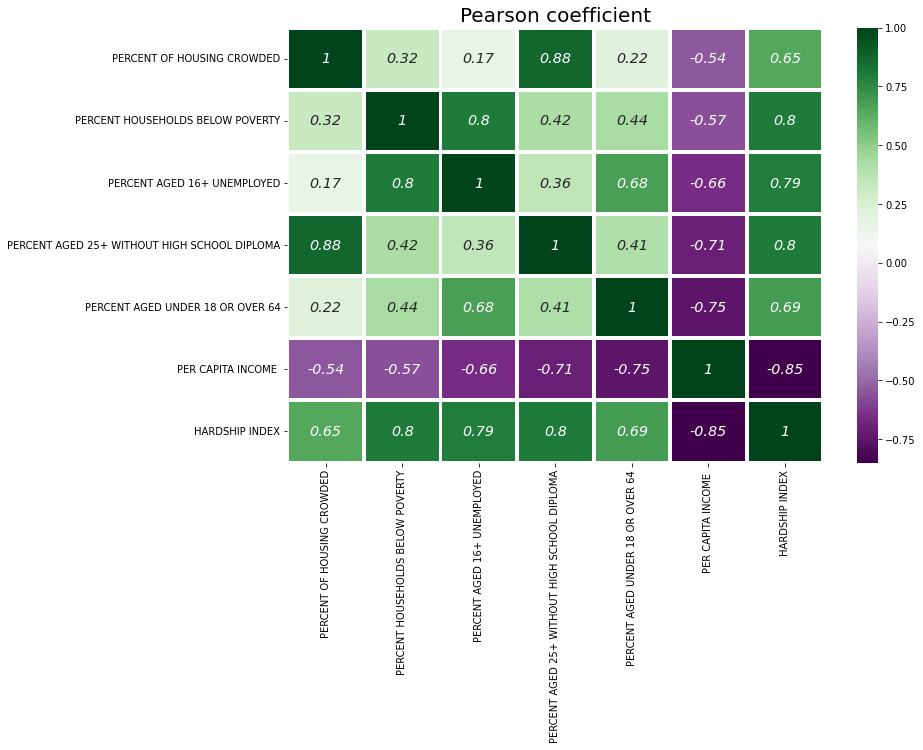

In [ ]:
correlations = df.corr()
show_heatmap(correlations, title='Pearson coefficient')

There is a lot of numbers... And by using `mask` argument we can filter out
ones we are not interested in

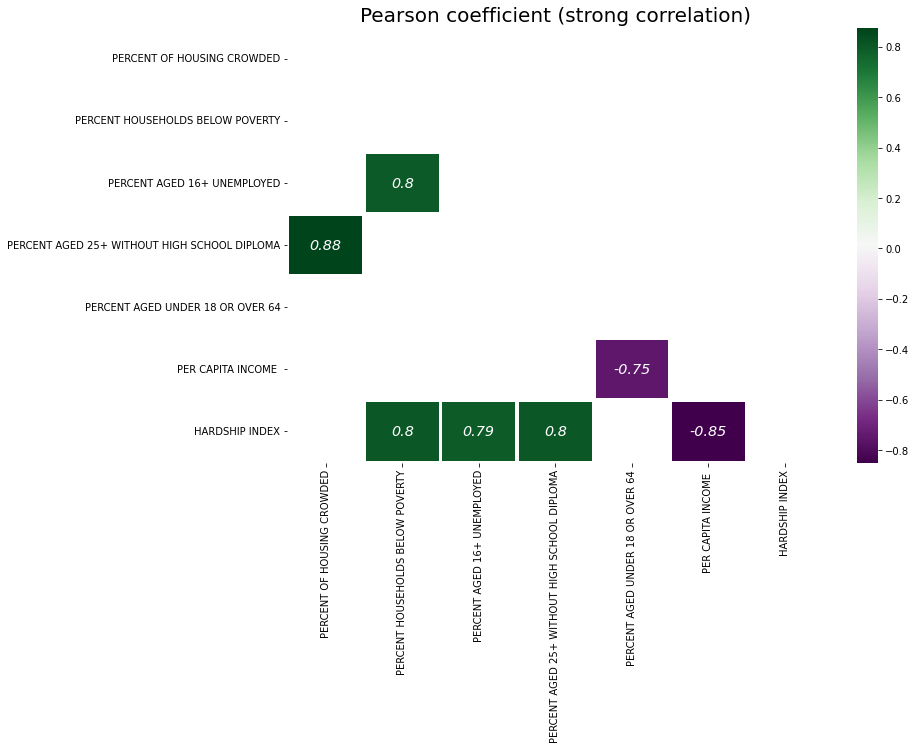

In [ ]:
upper_part = np.triu(np.ones_like(correlations))  # filter out values on and over the main diagonal
not_strong = correlations.applymap(lambda x: abs(x) < .75)  # filter out correlations with absolut value less than 0.75

show_heatmap(correlations, mask=(upper_part|not_strong), title='Pearson coefficient (strong correlation)')

As we can see, `'Hardship index' `strongly correlates with other indicators, and it's not surprising given that it's calculated based on them

Also, it easy to find the strongest correlation just by looking at the heatmap

#Spearman's rank correlation

In [ ]:
def get_significant_corr(dataframe, a=0.05):
    """
    calculate rho and pvalue for all columns in dataframe and filter them based on p-value
    """
    corrs = {}
    for comb in itertools.combinations((dataframe.columns), 2):
                corrs[comb] = spearmanr(dataframe[comb[0]], dataframe[comb[1]])
    return {key: value for key, value in corrs.items() if value[1] < a}

In [ ]:
get_significant_corr(df)

{('PERCENT OF HOUSING CROWDED',
  'PERCENT HOUSEHOLDS BELOW POVERTY'): SpearmanrResult(correlation=0.452291578811629, pvalue=3.634433615808159e-05),
 ('PERCENT OF HOUSING CROWDED',
  'PERCENT AGED 16+ UNEMPLOYED'): SpearmanrResult(correlation=0.30044445537963155, pvalue=0.007933039118304149),
 ('PERCENT OF HOUSING CROWDED',
  'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'): SpearmanrResult(correlation=0.8614867931276593, pvalue=8.942162691745935e-24),
 ('PERCENT OF HOUSING CROWDED',
  'PER CAPITA INCOME '): SpearmanrResult(correlation=-0.7019742416972341, pvalue=1.138326031884585e-12),
 ('PERCENT OF HOUSING CROWDED',
  'HARDSHIP INDEX'): SpearmanrResult(correlation=0.6813840140754792, pvalue=9.08502470264856e-12),
 ('PERCENT HOUSEHOLDS BELOW POVERTY',
  'PERCENT AGED 16+ UNEMPLOYED'): SpearmanrResult(correlation=0.7670003748311498, pvalue=4.1830917050436136e-16),
 ('PERCENT HOUSEHOLDS BELOW POVERTY',
  'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'): SpearmanrResult(correlation=0.52646

Maybe it's very informative, but not very human-readable. However, things can be changed with the help of the following function

In [ ]:
def print_top_significant(significant, n, sort_by, precision=3):
    """
    Find top n correlations sorted either by pvalue (in ascending order) or by rho (in descending order)
    """
    if sort_by == 'pvalue':
        top = sorted(significant, key=lambda x: significant[x][1])[:n]
    elif sort_by == 'rho':
        top = sorted(significant, key=lambda x: abs(significant[x][0]), reverse=True)[:n]
    else:
        raise ValueError("Invalid value for argument sort_by")
    for i in top:
        print(f'''"{i[0]}" and "{i[1]}": 
rho = {significant[i][0]:.{precision}f}, pvalue = {significant[i][1]:.{precision}f}\n''')

In [ ]:
significant = get_significant_corr(df)
print_top_significant(significant, 5, 'rho')

"PER CAPITA INCOME " and "HARDSHIP INDEX": 
rho = -0.980, pvalue = 0.000

"PERCENT OF HOUSING CROWDED" and "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA": 
rho = 0.861, pvalue = 0.000

"PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA" and "PER CAPITA INCOME ": 
rho = -0.856, pvalue = 0.000

"PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA" and "HARDSHIP INDEX": 
rho = 0.847, pvalue = 0.000

"PERCENT AGED 16+ UNEMPLOYED" and "HARDSHIP INDEX": 
rho = 0.824, pvalue = 0.000



To visualize p-values with heatmap let's create pandas dataframe

In [ ]:
def create_dataframe_with_spearman_pvalues(dataframe):
    """
    Works similar to pandas.DataFrame.corr, but returns dataframe with spearman p-values
    """
    pvalues = {}
    for i in dataframe.columns:
        pvalues[i] = [spearmanr(dataframe[i], dataframe[j])[1] for j in dataframe.columns]
    return pd.DataFrame(pvalues, index=dataframe.columns)

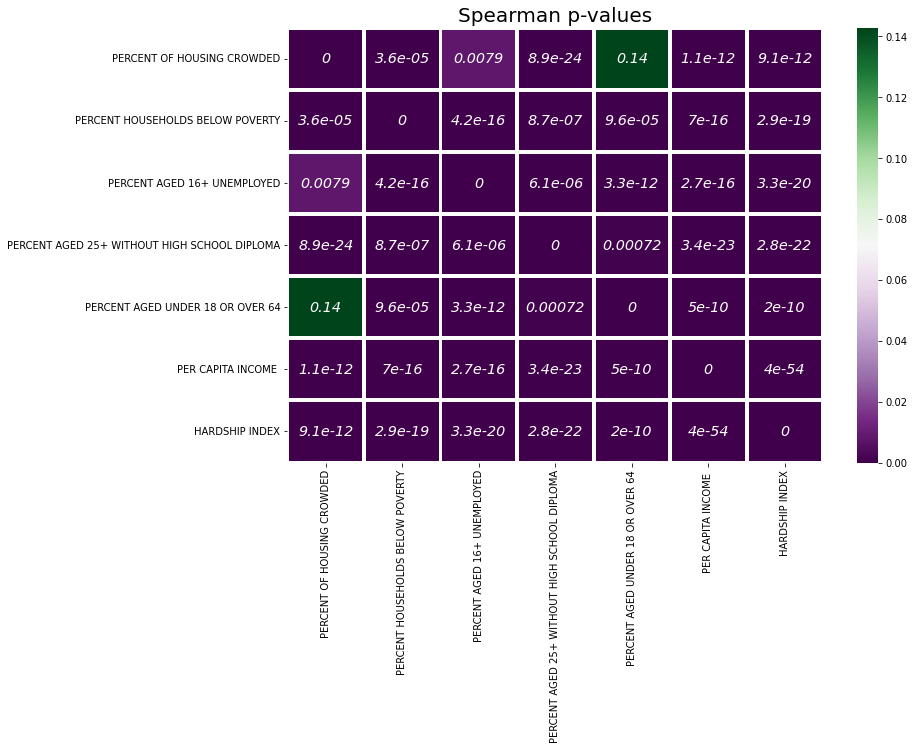

In [ ]:
pvalues = create_dataframe_with_spearman_pvalues(df)
show_heatmap(pvalues, title='Spearman p-values')

As we can see, all correlations are significant as pvalues are close to zero

But if it weren't the case, using `mask` with many conditions we could filter correlations by rho value to find only strong, and by pvalue to capture only significant

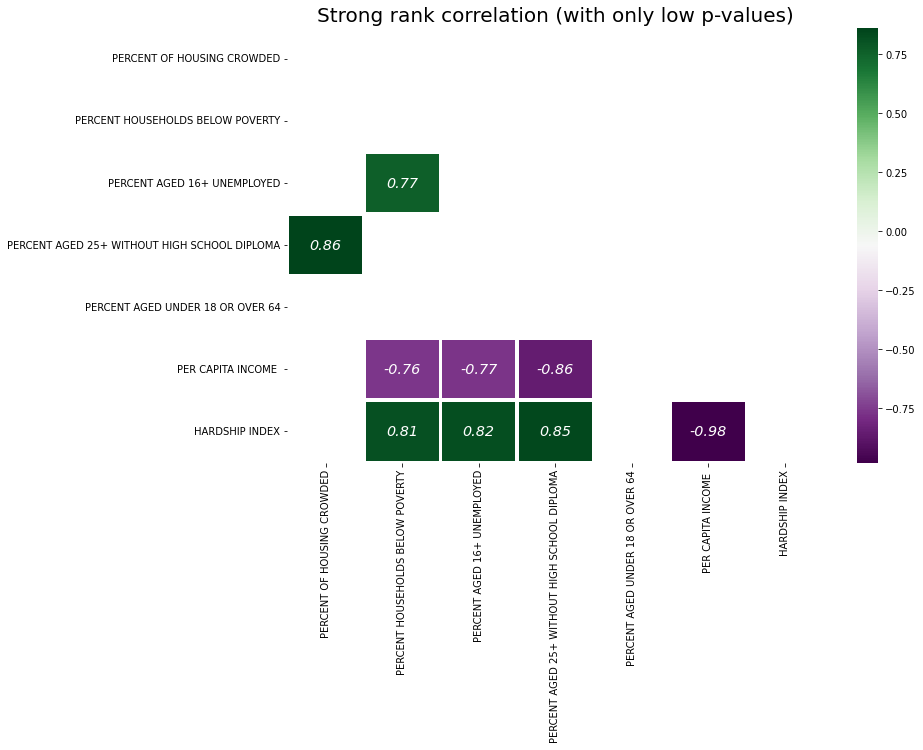

In [ ]:
correlations = df.corr(method='spearman')

upper_part = np.triu(np.ones_like(correlations))
not_strong = correlations.applymap(lambda x: abs(x) < .75) # filter out rho less than 0.75 or more than -0.75
not_significnat = pvalues.applymap(lambda x: x >= .5) # filter out pvalue more than 0.5

show_heatmap(correlations, mask=(upper_part|not_strong|not_significnat), title='Strong rank correlation (with only low p-values)')